# Extracting and processing STM Image Data from Omicron's propritary .Z_MTRX format 
In order to extract the images, first import the necessary packages. We will be using NanoscoPy to read the STM data and matplotlib to show the data.

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Custom modules
import sys
sys.path.append('../../NanoscoPy/')
from nanoscopy import spm
from nanoscopy.utilities import dialog_askdirectory

### Get Root Folder Path
Prompt the user for the directory which contains the .Z_mtrx files and the result file chain.

In [4]:
folder_path = dialog_askdirectory()

### Read all STM files in the folder

In [14]:
scans = spm.read(folder_path, metadata_source='filepath')

 Reading 19 mtrx images...Done ########## [100.00%]


### Check metadata summary

In [6]:
scans[0].summary()

'SL455-6_1to100_211209_-1.6V_50x50_16_1_Z'

### Collect forward trace images

In [7]:
fwd_scans = [spm_data.fwd() for spm_data in scans]

### Correct the forward sweep data
Each image is globally flattened via plane correction, followed by 2nd order polynomial background subtraction, line-by-line offset flattening, 3x3 gaussian smoothing, and CLAHE.

In [8]:
corrected_scans = spm.correct(fwd_scans, poly=True, equalize=True)

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(g, z)


 Corrcting images...Done ########## [100.00%]


### Show a comparison plot between some of the raw and processed images

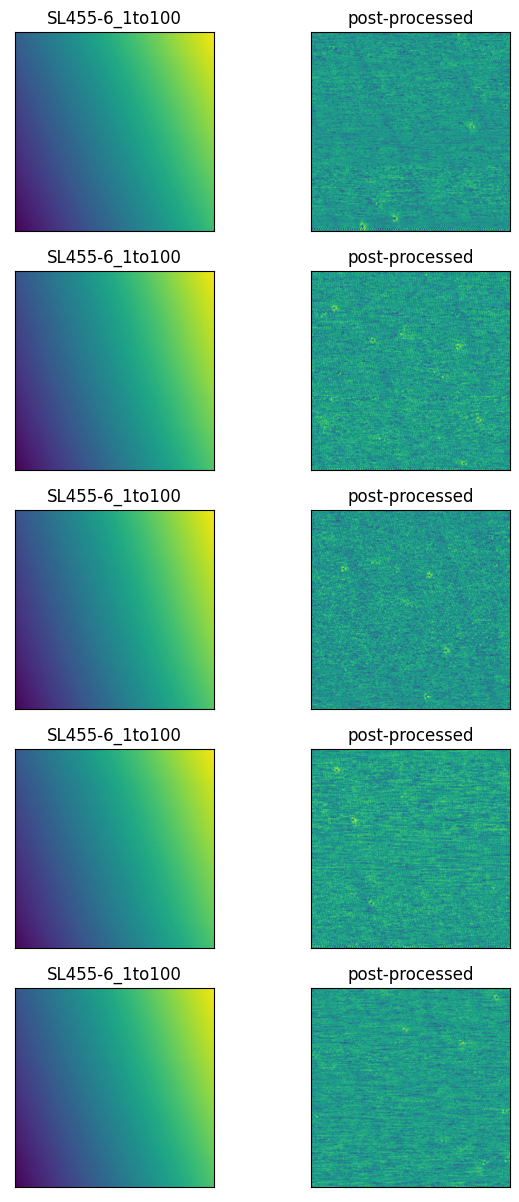

In [9]:
n = len(corrected_scans[:5])
fig, axs = plt.subplots(n, 2)
fig.set_figheight(15)
fig.set_figwidth(7)

for i in range(n):
    raw = scans[i]
    processed = corrected_scans[i]
    sample_name = f'{raw.sample_id()}'
    # sample_name = 'Original'

    axs[i, 0].imshow(raw.fwd() , origin = 'lower')
    axs[i, 0].set_title(sample_name)
    axs[i, 1].imshow(processed , origin = 'lower')
    axs[i, 1].set_title(f'post-processed')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

### Output directories 

In [10]:
dst_paths = [f'{Path(scan.path()).parent}\\{scan.summary()}.jpg' for scan in scans]
dst_paths

['C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_50x50_16_1_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_50x50_17_1_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_50x50_17_2_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_50x50_18_1_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_50x50_19_1_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_25x25_1_215_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to100_211209_-1.6V_25x25_1_222_Z.jpg',
 'C:\\Users\\da935101\\Datasets\\TMDs\\WSe2\\Hone-Barmak\\SL455-6_1to100\\211209\\SL455-6_1to10

### Export the data as jpg

In [11]:
spm.io.export_images(corrected_scans, dst_paths)

### Export metadata as csv 

In [12]:
spm.io.export_metadata(scans, folder_path)